<a href="https://colab.research.google.com/github/rouaLagha/TP3_Machine_Learning/blob/main/Exercice2TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


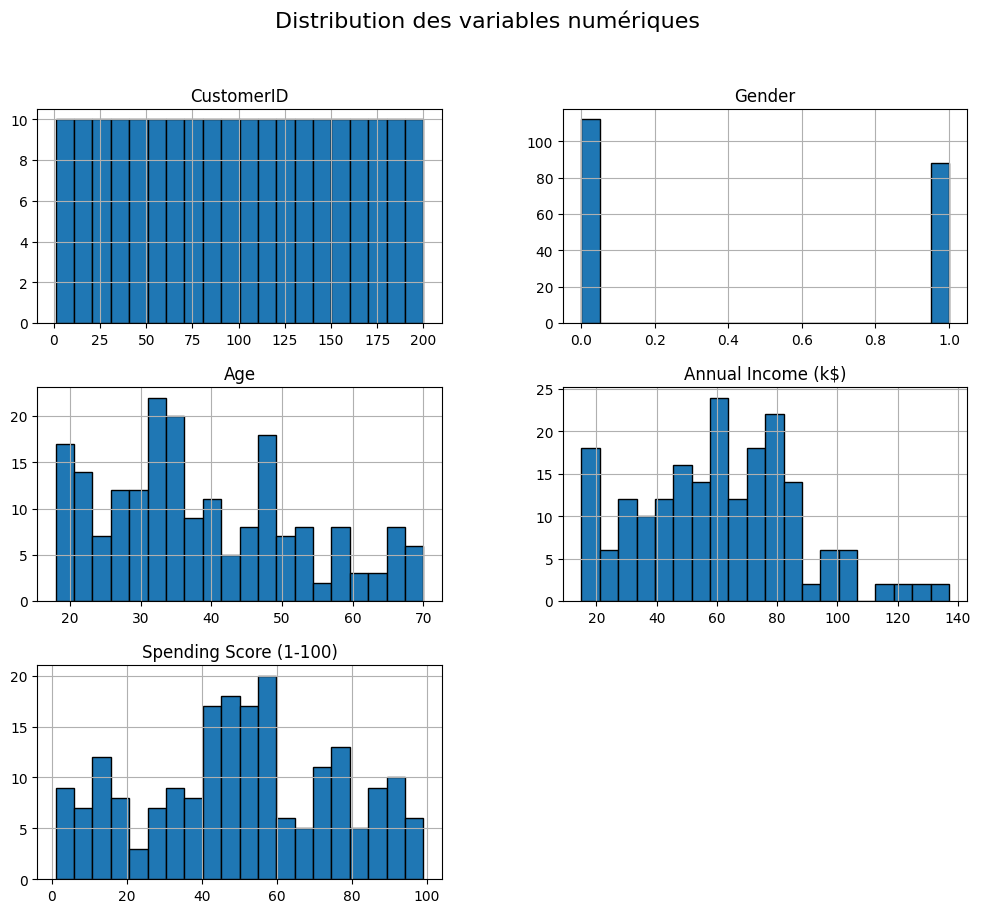

In [12]:
num_columns = df.select_dtypes(include=[np.number]).columns

df[num_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')

plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

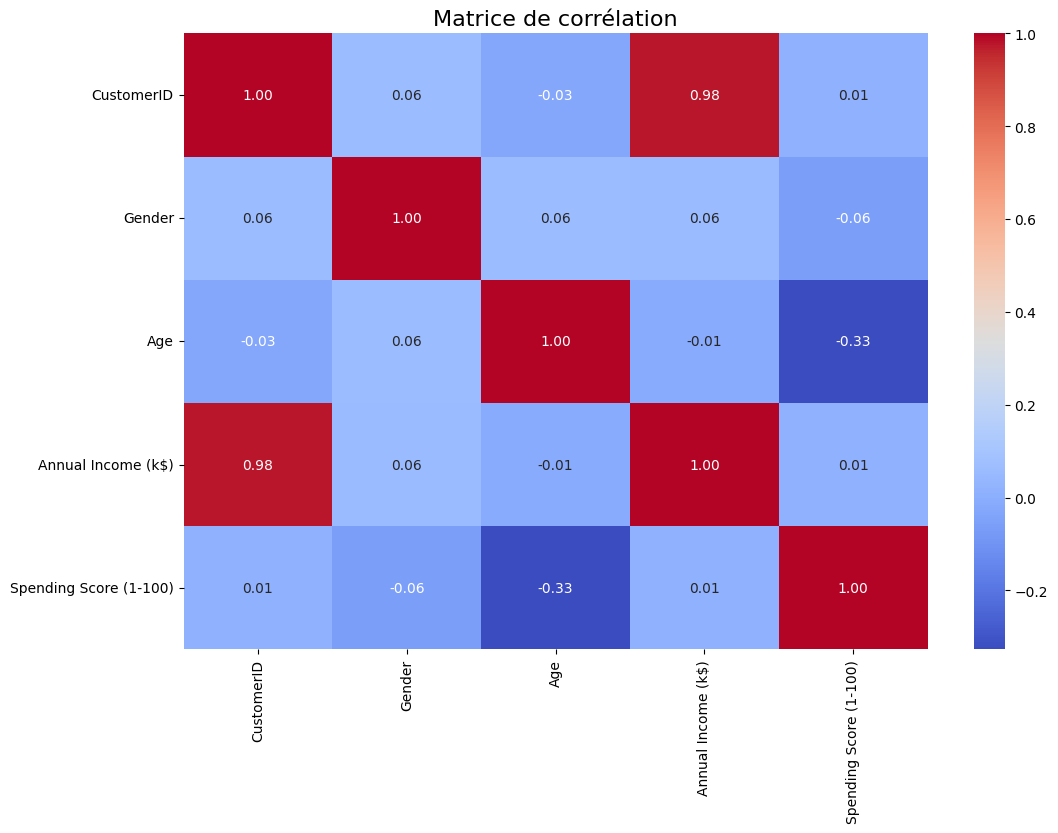

In [16]:
correlation_matrix = df[num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation', fontsize=16)
plt.show()

In [18]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

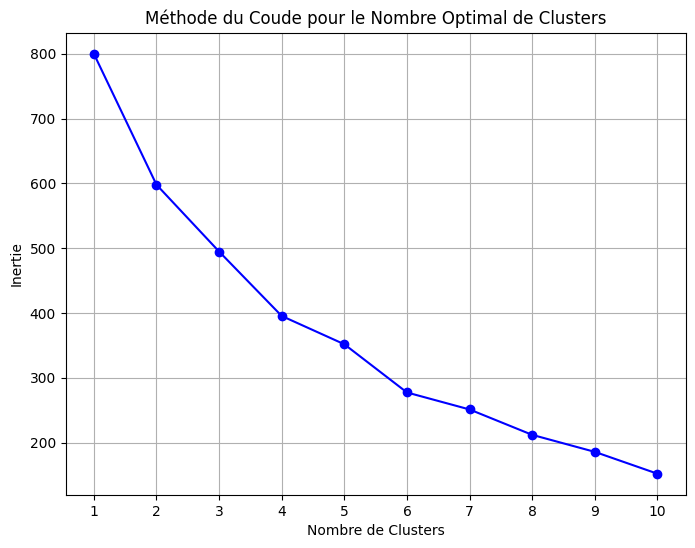

In [19]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title("Méthode du Coude pour le Nombre Optimal de Clusters")
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

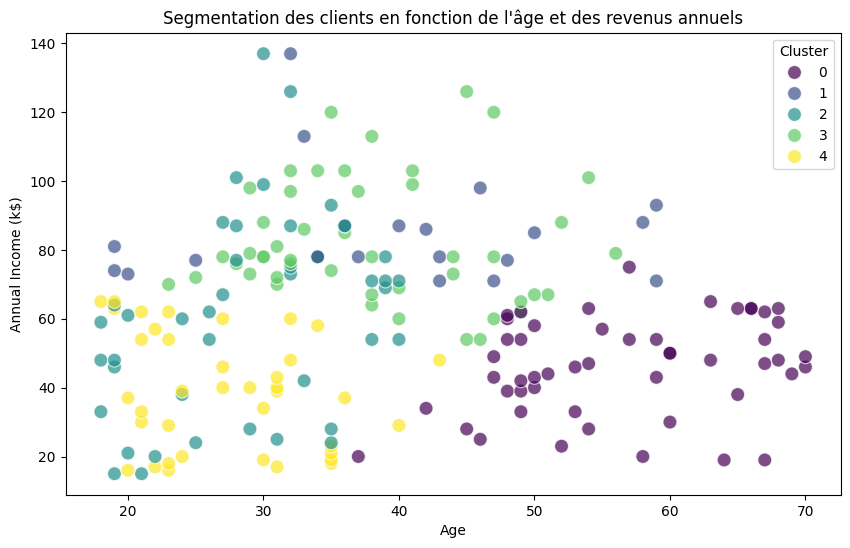

In [22]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title("Segmentation des clients en fonction de l'âge et des revenus annuels")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


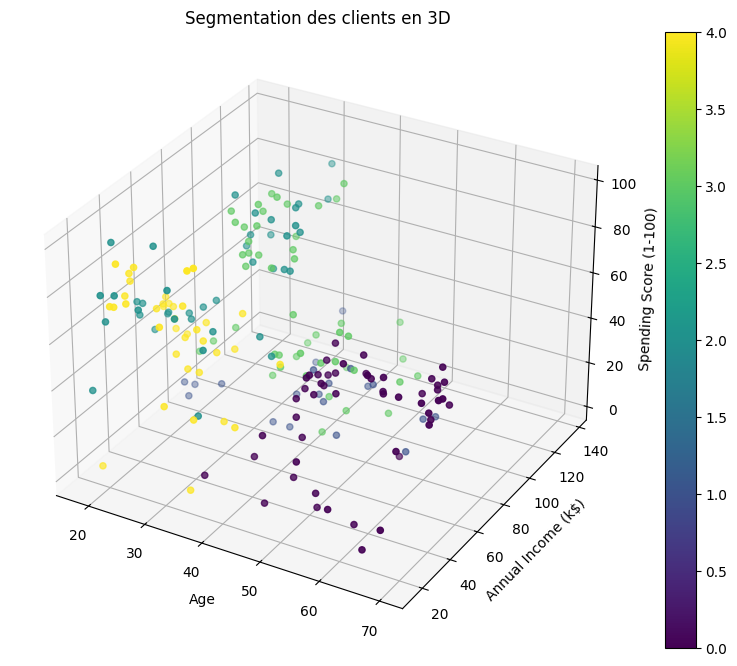

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("Segmentation des clients en 3D")
plt.colorbar(scatter)
plt.show()

In [25]:
print("Centres des clusters :")
print(kmeans.cluster_centers_)

Centres des clusters :
[[ 1.26457129 -0.55200479 -0.42262217  0.14062401]
 [ 0.04664835  0.93858626 -1.40339942  1.12815215]
 [-0.72911539  0.01315937  0.77791013  1.12815215]
 [-0.06832482  0.82302637  0.16495202 -0.88640526]
 [-0.82777211 -0.82895964  0.23333801 -0.88640526]]


In [27]:
for i in range(optimal_k):
    print(f"\nCluster {i} Profil :")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[features].mean())


Cluster 0 Profil :
Age                       56.470588
Annual Income (k$)        46.098039
Spending Score (1-100)    39.313725
Gender                     0.509804
dtype: float64

Cluster 1 Profil :
Age                       39.50
Annual Income (k$)        85.15
Spending Score (1-100)    14.05
Gender                     1.00
dtype: float64

Cluster 2 Profil :
Age                       28.690476
Annual Income (k$)        60.904762
Spending Score (1-100)    70.238095
Gender                     1.000000
dtype: float64

Cluster 3 Profil :
Age                       37.897959
Annual Income (k$)        82.122449
Spending Score (1-100)    54.448980
Gender                     0.000000
dtype: float64

Cluster 4 Profil :
Age                       27.315789
Annual Income (k$)        38.842105
Spending Score (1-100)    56.210526
Gender                     0.000000
dtype: float64
